# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(51, 51)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                37741
           取引回数                   51
           開始日時  2020-04-21 09:39:06
           終了日時  2020-04-21 21:28:16
        取引時間[H]      0 days 11:49:10
      取引単位[BTC]               0.0055
  利確しきい値[JPY]                 2000
損切りマージン[JPY]                 1000
-------------------  -------------------


トレード結果
-----------  --------
開始[JPY]       10090
終了[JPY]        9760
利益[JPY]        -330
開始[BTC]    0.021924
終了[BTC]    0.022328
利益[BTC]    0.000404
開始[TOTAL]     26394
終了[TOTAL]     26186
利益[TOTAL]      -208
-----------  --------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
     -208         -36.086    -171.914


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2020-04-21 16:12:13,sell,4089.250,buy,4084.300,4.950
2020-04-21 16:16:17,sell,4081.124,buy,4078.547,2.577
2020-04-21 16:23:23,buy,4085.999,sell,4082.634,-3.365
2020-04-21 17:00:31,buy,4085.994,sell,4091.318,5.324
2020-04-21 17:20:41,sell,4085.812,buy,4084.514,1.298
2020-04-21 17:22:11,sell,4080.100,buy,4077.749,2.351
2020-04-21 17:57:10,buy,4085.999,sell,4078.024,-7.975
2020-04-21 17:58:10,sell,4080.692,buy,4077.309,3.383
2020-04-21 18:53:18,buy,4085.993,sell,4040.833,-45.160


In [12]:
round(sum(profit_df.profit), 3)

-330.017

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(37741, 37741)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

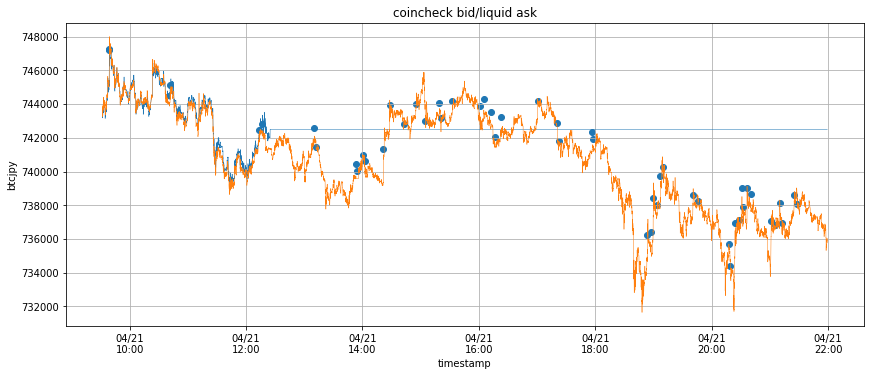

In [16]:
fig1

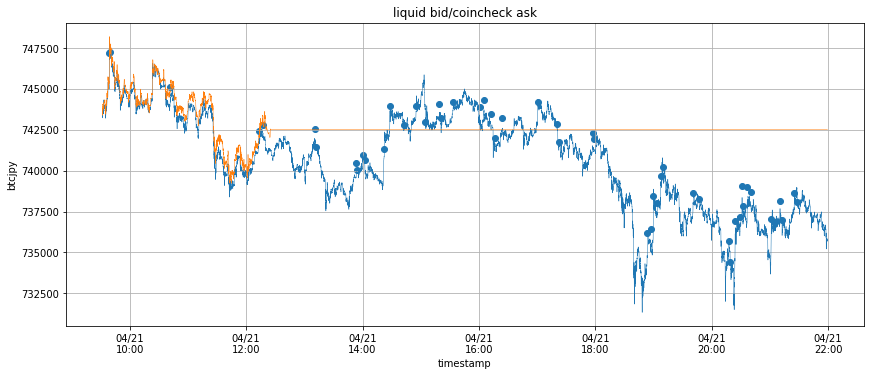

In [17]:
fig2